<a href="https://colab.research.google.com/github/NishatSoultanaChy/Android-Custom-ListView/blob/master/24_Dengue_compare_Regresion_1262_full_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery- Comparing Regressors**
>>We have to predict **pIC50** value based on** 1D & 2D descriptors** of drug-like molecules. 

>>Descriptors are features.

>>So, this is basically a regression problem, Here number of features are **1544** in total. 

>>and number of rows are **995** (after cleaning).

>> this is a **linear** dataset, all data are **numeric**


## **1. Import libraries**

In [ ]:
pip install --upgrade scikit-learn


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,ExpSineSquared, DotProduct,ConstantKernel)

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neural_network import MLPRegressor
import lightgbm as lgbm
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import RidgeCV
from sklearn.compose import TransformedTargetRegressor
from sklearn import linear_model
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LassoLarsCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import LarsCV
from sklearn.linear_model import ElasticNet
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import HistGradientBoostingRegressor

import scipy.stats


## **2. Load the data set**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis/Dengue/Google Colab/finalDataset_Descriptors_pIC50.csv')

In [ ]:
df = df.astype("float64")
df = pd.DataFrame(df).fillna(0)

In [ ]:
# summary of columns with nan values

cols_with_na = df.isnull().sum()
cols_with_na = cols_with_na[cols_with_na>0]
print(cols_with_na.sort_values(ascending=False))

Series([], dtype: int64)


In [ ]:
df

,nAcid,ALogP,ALogp2,AMR,nA,nR,nN,nD,nC,nF,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,pIC50
0,0.0,0.1303,0.016978,76.6665,0.0,0.0,0.0,0.0,0.0,0.0,...,37.268808,2.070489,12.001462,5.617355,6.384107,577.0,30.0,0.990,96.0,4.000000
1,1.0,0.1351,0.018252,75.1310,0.0,0.0,0.0,0.0,0.0,0.0,...,40.672022,2.033601,13.049575,13.049575,0.000000,793.0,31.0,0.161,108.0,4.909742
2,0.0,-0.3782,0.143035,117.4189,0.0,0.0,0.0,0.0,0.0,0.0,...,61.618273,2.053942,23.728277,13.795322,9.932955,2677.0,46.0,0.486,156.0,4.000000
3,1.0,-0.5094,0.259488,90.4680,0.0,0.0,0.0,0.0,0.0,0.0,...,47.732641,2.075332,17.368358,10.945714,6.422644,1124.0,35.0,0.861,126.0,4.292685
4,0.0,2.0117,4.046937,97.6620,0.0,0.0,0.0,0.0,0.0,0.0,...,52.344206,2.013239,28.415295,7.397555,18.458831,1499.0,48.0,1.628,138.0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,0.0,2.9575,8.746806,191.1120,1.0,0.0,0.0,0.0,0.0,0.0,...,92.273420,2.050520,22.120621,8.239302,13.881319,8858.0,65.0,3.852,228.0,5.886057
1098,0.0,0.6446,0.415509,154.1134,1.0,0.0,0.0,0.0,0.0,0.0,...,74.467051,2.012623,21.815551,8.212392,8.572996,5204.0,53.0,2.555,180.0,5.508638
1099,0.0,3.2664,10.669369,202.8743,1.0,0.0,0.0,0.0,0.0,0.0,...,97.981050,2.041272,30.258289,11.387132,13.840981,10637.0,71.0,2.543,244.0,5.602060
1100,0.0,3.6949,13.652286,200.5444,1.0,0.0,0.0,0.0,0.0,0.0,...,95.976505,2.042053,27.202691,8.237188,13.881293,9896.0,71.0,4.373,240.0,6.267606


In [ ]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

In [ ]:
X.describe()

,nAcid,ALogP,ALogp2,AMR,nA,nR,nN,nD,nC,nF,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
count,1102.000000,1102.000000,1.102000e+03,1102.000000,1102.000000,1102.000000,1102.000000,1102.0,1102.000000,1102.000000,...,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000
mean,0.361162,1.030531,3.799532e+00,112.897064,0.202359,0.023593,0.008167,0.0,0.006352,0.065336,...,9.057146,57.086708,2.026004,22.288813,11.047435,7.786788,2862.996370,45.674229,2.114374,147.856624
std,0.535953,1.655302,7.521271e+00,37.093691,1.016608,0.163373,0.108354,0.0,0.079483,0.725365,...,1.432466,19.408928,0.029189,9.114724,5.168018,5.829000,6916.206606,16.707725,1.351212,49.205028
min,0.000000,-10.917600,4.000000e-08,34.332700,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,4.930406,21.173458,1.911061,4.764110,0.000000,0.000000,140.000000,12.000000,-1.529000,52.000000
25%,0.000000,0.358975,5.247205e-01,91.534750,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,8.176432,46.579659,2.008992,16.778036,7.668856,3.458611,1190.250000,36.000000,1.274500,122.000000
50%,0.000000,1.175250,1.875942e+00,109.626550,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,9.001615,55.362092,2.025019,21.964411,10.468701,6.483419,1962.000000,43.000000,2.029000,144.000000
75%,1.000000,2.030400,4.611220e+00,127.755275,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,9.830118,64.248158,2.043913,26.219329,13.449096,9.984968,2865.750000,52.750000,2.944000,168.000000
max,2.000000,7.320200,1.191940e+02,501.600300,12.000000,2.000000,2.000000,0.0,1.000000,14.000000,...,18.768044,265.530577,2.128018,102.276064,50.909680,50.048206,121003.000000,220.000000,8.148000,652.000000


# **4. Data pre-processing**

In [ ]:
# Examine X dimension
X.shape

(1102, 1544)

In [ ]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold()    
XX = pd.DataFrame(selection.fit_transform(X))
XX.shape

(1102, 1262)

In [ ]:
feature_list = X[X.columns[selection.get_support(indices=True)]].columns
feature_list

Index(['nAcid', 'ALogP', 'ALogp2', 'AMR', 'nA', 'nR', 'nN', 'nC', 'nF', 'nG',
       ...
       'AMW', 'WTPT-1', 'WTPT-2', 'WTPT-3', 'WTPT-4', 'WTPT-5', 'WPATH',
       'WPOL', 'XLogP', 'Zagreb'],
      dtype='object', length=1262)

### **Perform data splitting using 80/20 ratio**

In [ ]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(XX, Y, test_size=0.2, random_state=42)



# **6. Compare ML algorithms using scikit learn library**


In [ ]:
df_reg_result = pd.DataFrame(data=[], index =[], columns =["MAE", "MAPE", "MSE", "RMSE", "R2"])


In [ ]:
# Applying linear reg
lin_regressor = LinearRegression().fit(X_train, Y_train)
pred_LR = lin_regressor.predict(X_test)

df_reg_result.loc['Linear'] = [round(mean_absolute_error(Y_test, pred_LR ), 4), round(mean_absolute_percentage_error(Y_test, pred_LR ),4),
                                          round(mean_squared_error(Y_test, pred_LR ),4), round(mean_squared_error(Y_test, pred_LR , squared=False), 4),
                               round(r2_score(Y_test, pred_LR ), 4)]
#SVR
svr_rbf=SVR() 
svreg =svr_rbf.fit(X_train, Y_train)
pred_SVR = svreg.predict(X_test)

df_reg_result.loc['SVR'] = [round(mean_absolute_error(Y_test, pred_SVR ), 4), round( mean_absolute_percentage_error(Y_test, pred_SVR ),4),
                                          round(mean_squared_error(Y_test, pred_SVR ),4), round(mean_squared_error(Y_test, pred_SVR , squared=False), 4),
                            round(r2_score(Y_test, pred_SVR ), 4)]


                                            
# GaussianProcessRegressor
#kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))
gp = GaussianProcessRegressor() 
gpreg=gp.fit(X_train, Y_train)
pred_GP = gpreg.predict(X_test)

df_reg_result.loc['GaussianProcess'] = [round(mean_absolute_error(Y_test, pred_GP ), 4), round( mean_absolute_percentage_error(Y_test, pred_GP ),4),
                                          round(mean_squared_error(Y_test, pred_GP ),4), round(mean_squared_error(Y_test, pred_GP , squared=False), 4),
                                        round(r2_score(Y_test, pred_GP ), 4)]

# decision tree
tree=DecisionTreeRegressor() #max_depth=1
DTreg= tree.fit(X_train, Y_train)
pred_DT = DTreg.predict(X_test)

df_reg_result.loc['DecisionTree'] = [round(mean_absolute_error(Y_test, pred_DT ), 4), round( mean_absolute_percentage_error(Y_test, pred_DT ),4),
                                            round(mean_squared_error(Y_test, pred_DT ),4), round(mean_squared_error(Y_test, pred_DT , squared=False), 4),
                                     round(r2_score(Y_test, pred_DT ), 4)]

# Random Forest
forest=RandomForestRegressor() 
RFreg= forest.fit(X_train, Y_train)
pred_RF = RFreg.predict(X_test)

df_reg_result.loc['RandomForest'] = [round(mean_absolute_error(Y_test, pred_RF ), 4), round( mean_absolute_percentage_error(Y_test, pred_RF ),4),
                                          round(mean_squared_error(Y_test, pred_RF ),4), round(mean_squared_error(Y_test, pred_RF , squared=False), 4),
                                     round(r2_score(Y_test, pred_RF ), 4)]

#SGD
sgd = SGDRegressor()
sgd_reg = sgd.fit(X_train, Y_train)
pred_SGD = sgd_reg.predict(X_test)

df_reg_result.loc['SGD'] = [round(mean_absolute_error(Y_test, pred_SGD ), 4), round( mean_absolute_percentage_error(Y_test, pred_SGD ),4),
                                          round(mean_squared_error(Y_test, pred_SGD ),4), round(mean_squared_error(Y_test, pred_SGD , squared=False), 4),
                            round(r2_score(Y_test, pred_SGD ), 4)]

#Extre Tree Reg
extraTreereg = ExtraTreesRegressor().fit(X_train, Y_train) 
pred_ET = extraTreereg.predict(X_test)

df_reg_result.loc['ExtraTree'] = [round(mean_absolute_error(Y_test, pred_ET ), 4), round( mean_absolute_percentage_error(Y_test, pred_ET ),4),
                                          round(mean_squared_error(Y_test, pred_ET ),4), round(mean_squared_error(Y_test, pred_ET , squared=False), 4),
                                  round(r2_score(Y_test, pred_ET), 4)]


#BaggingRegressor
bregr = BaggingRegressor().fit(X_train, Y_train)
pred_breg = bregr.predict(X_test)

df_reg_result.loc['BaggingRegressor'] = [round(mean_absolute_error(Y_test, pred_breg ), 4), round( mean_absolute_percentage_error(Y_test, pred_breg ),4),
                                          round(mean_squared_error(Y_test, pred_breg ),4), round(mean_squared_error(Y_test, pred_breg , squared=False), 4),
                                         round(r2_score(Y_test, pred_breg ), 4)]

# MLPRegressor
MLPregr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, Y_train)
pred_MLP =MLPregr.predict(X_test)

df_reg_result.loc['MLP'] = [round(mean_absolute_error(Y_test, pred_MLP ), 4), round( mean_absolute_percentage_error(Y_test, pred_MLP ),4),
                                          round(mean_squared_error(Y_test, pred_MLP ),4), round(mean_squared_error(Y_test, pred_MLP , squared=False), 4),
                            round(r2_score(Y_test, pred_MLP), 4)]


             
#HistGradientBoostingRegressor
HGB_reg = HistGradientBoostingRegressor().fit(X_train, Y_train)
pred_HGB = HGB_reg.predict(X_test)

df_reg_result.loc['HistGB'] = [round(mean_absolute_error(Y_test, pred_HGB ), 4), round( mean_absolute_percentage_error(Y_test, pred_HGB ),4),
                                          round(mean_squared_error(Y_test, pred_HGB ),4), round(mean_squared_error(Y_test, pred_HGB , squared=False), 4),
                               round(r2_score(Y_test, pred_HGB ), 4)]


#LGBMRegressor
LGBM_reg = lgbm.sklearn.LGBMRegressor().fit(X_train, Y_train) 
pred_LGBM =LGBM_reg.predict(X_test)

df_reg_result.loc['LightGBM'] = [round(mean_absolute_error(Y_test, pred_LGBM ), 4), round( mean_absolute_percentage_error(Y_test, pred_LGBM ),4),
                                          round(mean_squared_error(Y_test, pred_LGBM ),4), round(mean_squared_error(Y_test, pred_LGBM , squared=False), 4),
                                 round(r2_score(Y_test, pred_LGBM ), 4)]

#NuSVR
nuSVR_reg = NuSVR().fit(X_train, Y_train)
pred_nuSVR =nuSVR_reg.predict(X_test)


df_reg_result.loc['NuSVR'] = [round(mean_absolute_error(Y_test, pred_nuSVR ), 4), round( mean_absolute_percentage_error(Y_test, pred_nuSVR ),4),
                                          round(mean_squared_error(Y_test, pred_nuSVR ),4), round(mean_squared_error(Y_test, pred_nuSVR , squared=False), 4),
                              round(r2_score(Y_test, pred_nuSVR ), 4)]
                             
#GradientBoostingRegressor
GB_reg = GradientBoostingRegressor(random_state=0).fit(X_train, Y_train)
pred_GradBost =GB_reg.predict(X_test)

df_reg_result.loc['GradientBoost'] = [round(mean_absolute_error(Y_test, pred_GradBost ), 4), round( mean_absolute_percentage_error(Y_test, pred_GradBost ),4),
                                          round(mean_squared_error(Y_test, pred_GradBost ),4), round(mean_squared_error(Y_test, pred_GradBost , squared=False), 4),
                                      round(r2_score(Y_test, pred_GradBost), 4)]
                     
#XGBRegressor
xgb_reg = XGBRegressor(objective ='reg:squarederror').fit(X_train, Y_train)
pred_XGB =xgb_reg.predict(X_test)

df_reg_result.loc['XGB'] = [round(mean_absolute_error(Y_test, pred_XGB ), 4), round( mean_absolute_percentage_error(Y_test, pred_XGB ),4),
                                          round(mean_squared_error(Y_test, pred_XGB ),4), round(mean_squared_error(Y_test, pred_XGB , squared=False), 4),
                            round(r2_score(Y_test, pred_XGB ), 4)]
                

#TransformedTargetRegressor
tt_reg = TransformedTargetRegressor(regressor=LinearRegression()).fit(X_train, Y_train)
pred_TransTarget = tt_reg.predict(X_test)

df_reg_result.loc['TransformedTargt'] = [round(mean_absolute_error(Y_test, pred_TransTarget ), 4), round( mean_absolute_percentage_error(Y_test, pred_TransTarget ),4),
                                          round(mean_squared_error(Y_test, pred_TransTarget ),4), round(mean_squared_error(Y_test, pred_TransTarget , squared=False), 4),
                                         round(r2_score(Y_test, pred_TransTarget ), 4)]

#AdaBoostRegressor
AdaBoost_regr = AdaBoostRegressor().fit(X_train, Y_train) 
pred_Ada = AdaBoost_regr.predict(X_test)

df_reg_result.loc['AdaBoost'] = [round(mean_absolute_error(Y_test, pred_Ada ), 4), round( mean_absolute_percentage_error(Y_test, pred_Ada ),4),
                                          round(mean_squared_error(Y_test, pred_Ada ),4), round(mean_squared_error(Y_test, pred_Ada , squared=False), 4),
                                 round(r2_score(Y_test, pred_Ada ), 4)]


#LarsCV
larsCV_reg = LarsCV(cv=5, normalize=False).fit(X_train, Y_train)
pred_LarsCV= larsCV_reg.predict(X_test)

df_reg_result.loc['LarsCV'] = [round(mean_absolute_error(Y_test, pred_LarsCV ), 4), round( mean_absolute_percentage_error(Y_test, pred_LarsCV ),4),
                                          round(mean_squared_error(Y_test, pred_LarsCV ),4), round(mean_squared_error(Y_test, pred_LarsCV , squared=False), 4),
                               round(r2_score(Y_test, pred_LarsCV ), 4)]


#DummyRegressor
dummy_regr = DummyRegressor().fit(X_train, Y_train)#strategy="mean"
pred_dummy=dummy_regr.predict(X_test)

df_reg_result.loc['Dummy'] = [round(mean_absolute_error(Y_test, pred_dummy ), 4), round( mean_absolute_percentage_error(Y_test, pred_dummy ),4),
                                          round(mean_squared_error(Y_test, pred_dummy ),4), round(mean_squared_error(Y_test, pred_dummy , squared=False), 4),
                              round(r2_score(Y_test, pred_dummy ), 4)]
#PassiveAggressiveRegressor
PAR_regr = PassiveAggressiveRegressor().fit(X_train, Y_train) #max_iter=100, random_state=0
pred_PAggr = PAR_regr.predict(X_test)


df_reg_result.loc['PassiveAggressive'] = [round(mean_absolute_error(Y_test, pred_PAggr ), 4), round( mean_absolute_percentage_error(Y_test, pred_PAggr ),4),
                                          round(mean_squared_error(Y_test, pred_PAggr ),4), round(mean_squared_error(Y_test, pred_PAggr , squared=False), 4),
                                          round(r2_score(Y_test, pred_PAggr ), 4)]

#BayesianRidge()
bayesRig_reg = BayesianRidge().fit(X_train, Y_train)
pred_bayesRig = bayesRig_reg.predict(X_test)

df_reg_result.loc['BayesianRidge'] = [round(mean_absolute_error(Y_test, pred_bayesRig ), 4), round( mean_absolute_percentage_error(Y_test, pred_bayesRig ),4),
                                          round(mean_squared_error(Y_test, pred_bayesRig ),4), round(mean_squared_error(Y_test, pred_bayesRig , squared=False), 4),
                                      round(r2_score(Y_test, pred_bayesRig ), 4)]



In [ ]:
sorted_reg_result= df_reg_result.sort_values(by=['RMSE'])
sorted_reg_result

,MAE,MAPE,MSE,RMSE,R2
ExtraTree,2.344000e-01,5.210000e-02,1.020000e-01,3.193000e-01,4.593000e-01
GradientBoost,2.445000e-01,5.430000e-02,1.022000e-01,3.196000e-01,4.583000e-01
XGB,2.397000e-01,5.310000e-02,1.025000e-01,3.201000e-01,4.567000e-01
RandomForest,2.396000e-01,5.330000e-02,1.027000e-01,3.205000e-01,4.554000e-01
HistGB,2.370000e-01,5.250000e-02,1.032000e-01,3.212000e-01,4.529000e-01
LightGBM,2.420000e-01,5.390000e-02,1.044000e-01,3.231000e-01,4.465000e-01
BaggingRegressor,2.573000e-01,5.750000e-02,1.103000e-01,3.321000e-01,4.151000e-01
AdaBoost,2.781000e-01,6.270000e-02,1.249000e-01,3.535000e-01,3.375000e-01
BayesianRidge,2.809000e-01,6.230000e-02,1.310000e-01,3.619000e-01,3.054000e-01
DecisionTree,2.939000e-01,6.450000e-02,1.699000e-01,4.122000e-01,9.910000e-02


# Plotting result

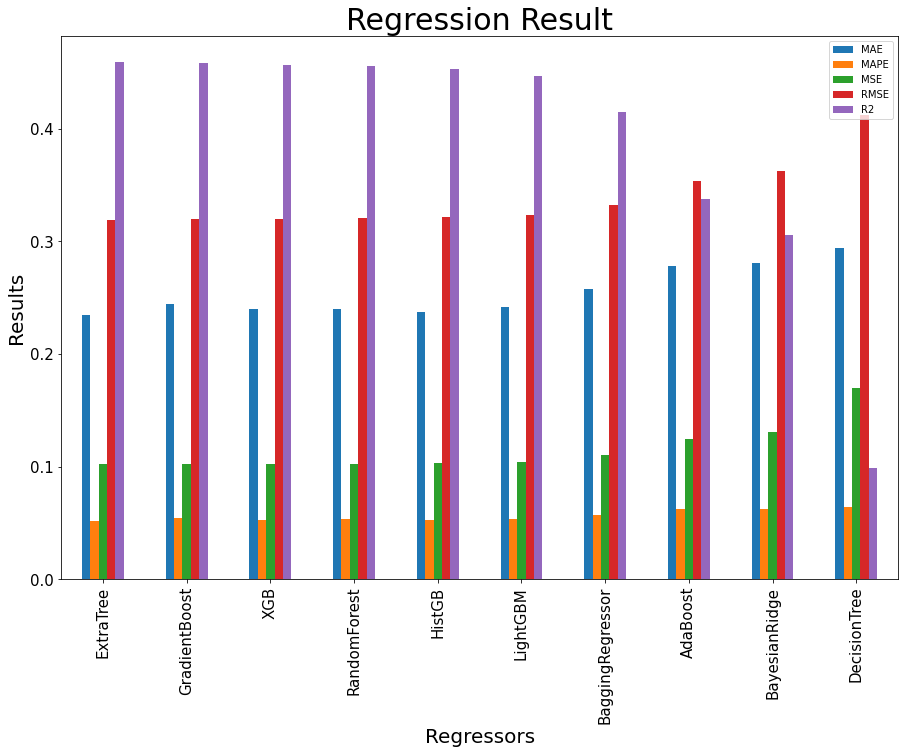

In [ ]:
plotdata =sorted_reg_result.head(10)
plt = plotdata.plot(kind="bar",figsize=(15, 10), fontsize = 15)

plt.set_title('Regression Result', fontsize= 30)
plt.set_xlabel("Regressors", fontsize=20)
plt.set_ylabel("Results", fontsize=20)
plt.figure.savefig('sorted_reg_result_10.png')

#plt.savefig("static/images/sorted_reg_result_10.png")

In [ ]:
sorted_reg_result.to_csv('sorted_reg_result.csv', index=True)

from google.colab import files
files.download('sorted_reg_result.csv')
files.download("sorted_reg_result_10.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

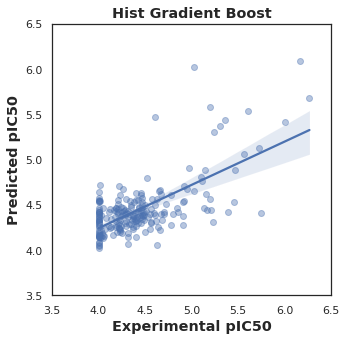

In [ ]:
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, pred_HGB, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(3.5, 6.5)
ax.set_ylim(3.5, 6.5)
ax.figure.set_size_inches(5, 5)
ax.set_title("Hist Gradient Boost", fontsize='large', fontweight='bold')
plt.savefig("HistGradientBoost.png")

plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

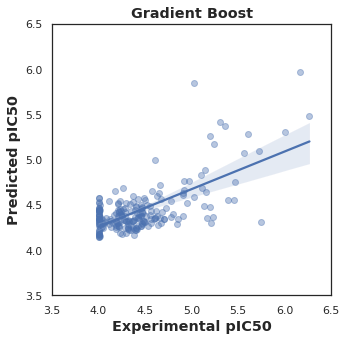

In [ ]:
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, pred_GradBost, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_title("Gradient Boost", fontsize='large', fontweight='bold')

ax.set_xlim(3.5, 6.5)
ax.set_ylim(3.5, 6.5)
ax.figure.set_size_inches(5, 5)
plt.savefig("GradientBoost.png")

plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

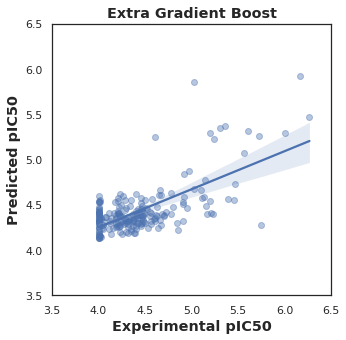

In [ ]:
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, pred_XGB, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_title("Extra Gradient Boost", fontsize='large', fontweight='bold')

ax.set_xlim(3.5, 6.5)
ax.set_ylim(3.5, 6.5)
ax.figure.set_size_inches(5, 5)
plt.savefig("ExtraGradientBoost.png")

plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

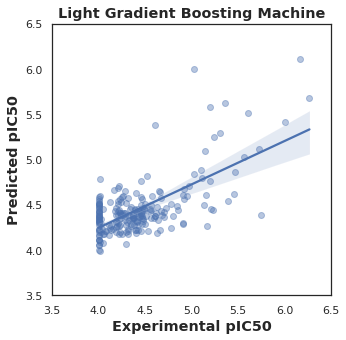

In [ ]:
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, pred_LGBM, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_title("Light Gradient Boosting Machine", fontsize='large', fontweight='bold')

ax.set_xlim(3.5, 6.5)
ax.set_ylim(3.5, 6.5)
ax.figure.set_size_inches(5, 5)
plt.savefig("LightGradientBoostingMachine.png")

plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

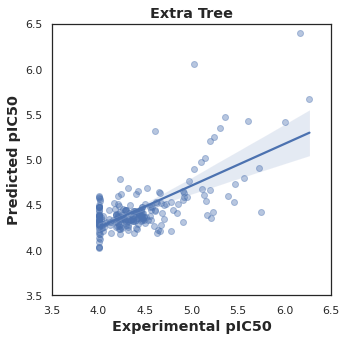

In [ ]:
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, pred_ET, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_title("Extra Tree", fontsize='large', fontweight='bold')

ax.set_xlim(3.5, 6.5)
ax.set_ylim(3.5, 6.5)
ax.figure.set_size_inches(5, 5)
plt.savefig("Extra Tree.png")

plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

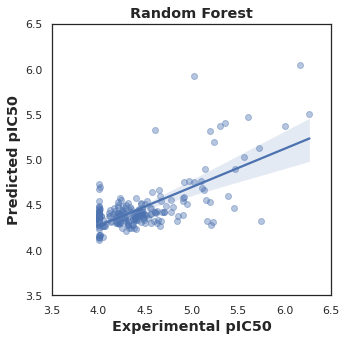

In [ ]:
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, pred_RF, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_title("Random Forest", fontsize='large', fontweight='bold')

ax.set_xlim(3.5, 6.5)
ax.set_ylim(3.5, 6.5)
ax.figure.set_size_inches(5, 5)
plt.savefig("RandomForest.png")

plt.show

In [ ]:
from google.colab import files
files.download("HistGradientBoost.png")

files.download("GradientBoost.png")

files.download("ExtraGradientBoost.png")
files.download("LightGradientBoostingMachine.png")

files.download("Extra Tree.png")
files.download("RandomForest.png")  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **A. RF Feature Importance**

In [ ]:

#regressor = RandomForestRegressor().fit(X_train, Y_train)

RFreg.feature_importances_


array([1.52090832e-05, 4.27378235e-04, 1.29685615e-03, ...,
       3.88279909e-04, 3.82842321e-03, 8.71924230e-05])

In [ ]:
col_names = feature_list
list_of_tuples = list(zip(col_names, RFreg.feature_importances_))
list_of_tuples 
df = pd.DataFrame(list_of_tuples,
                  columns = ['Descriptor', 'Importance'])
df_featureImportance = df.sort_values("Importance", ascending=False).reset_index(drop=True)
df_featureImportance

,Descriptor,Importance
0,SpMax7_Bhi,0.043962
1,Kier2,0.020837
2,IC5,0.017372
3,SpMAD_Dze,0.015334
4,SpMin8_Bhs,0.012479
...,...,...
1257,nwHBd,0.000000
1258,mindsssAs,0.000000
1259,n3HeteroRing,0.000000
1260,SHtCH,0.000000


In [ ]:
plotdata = df_featureImportance.head(100)


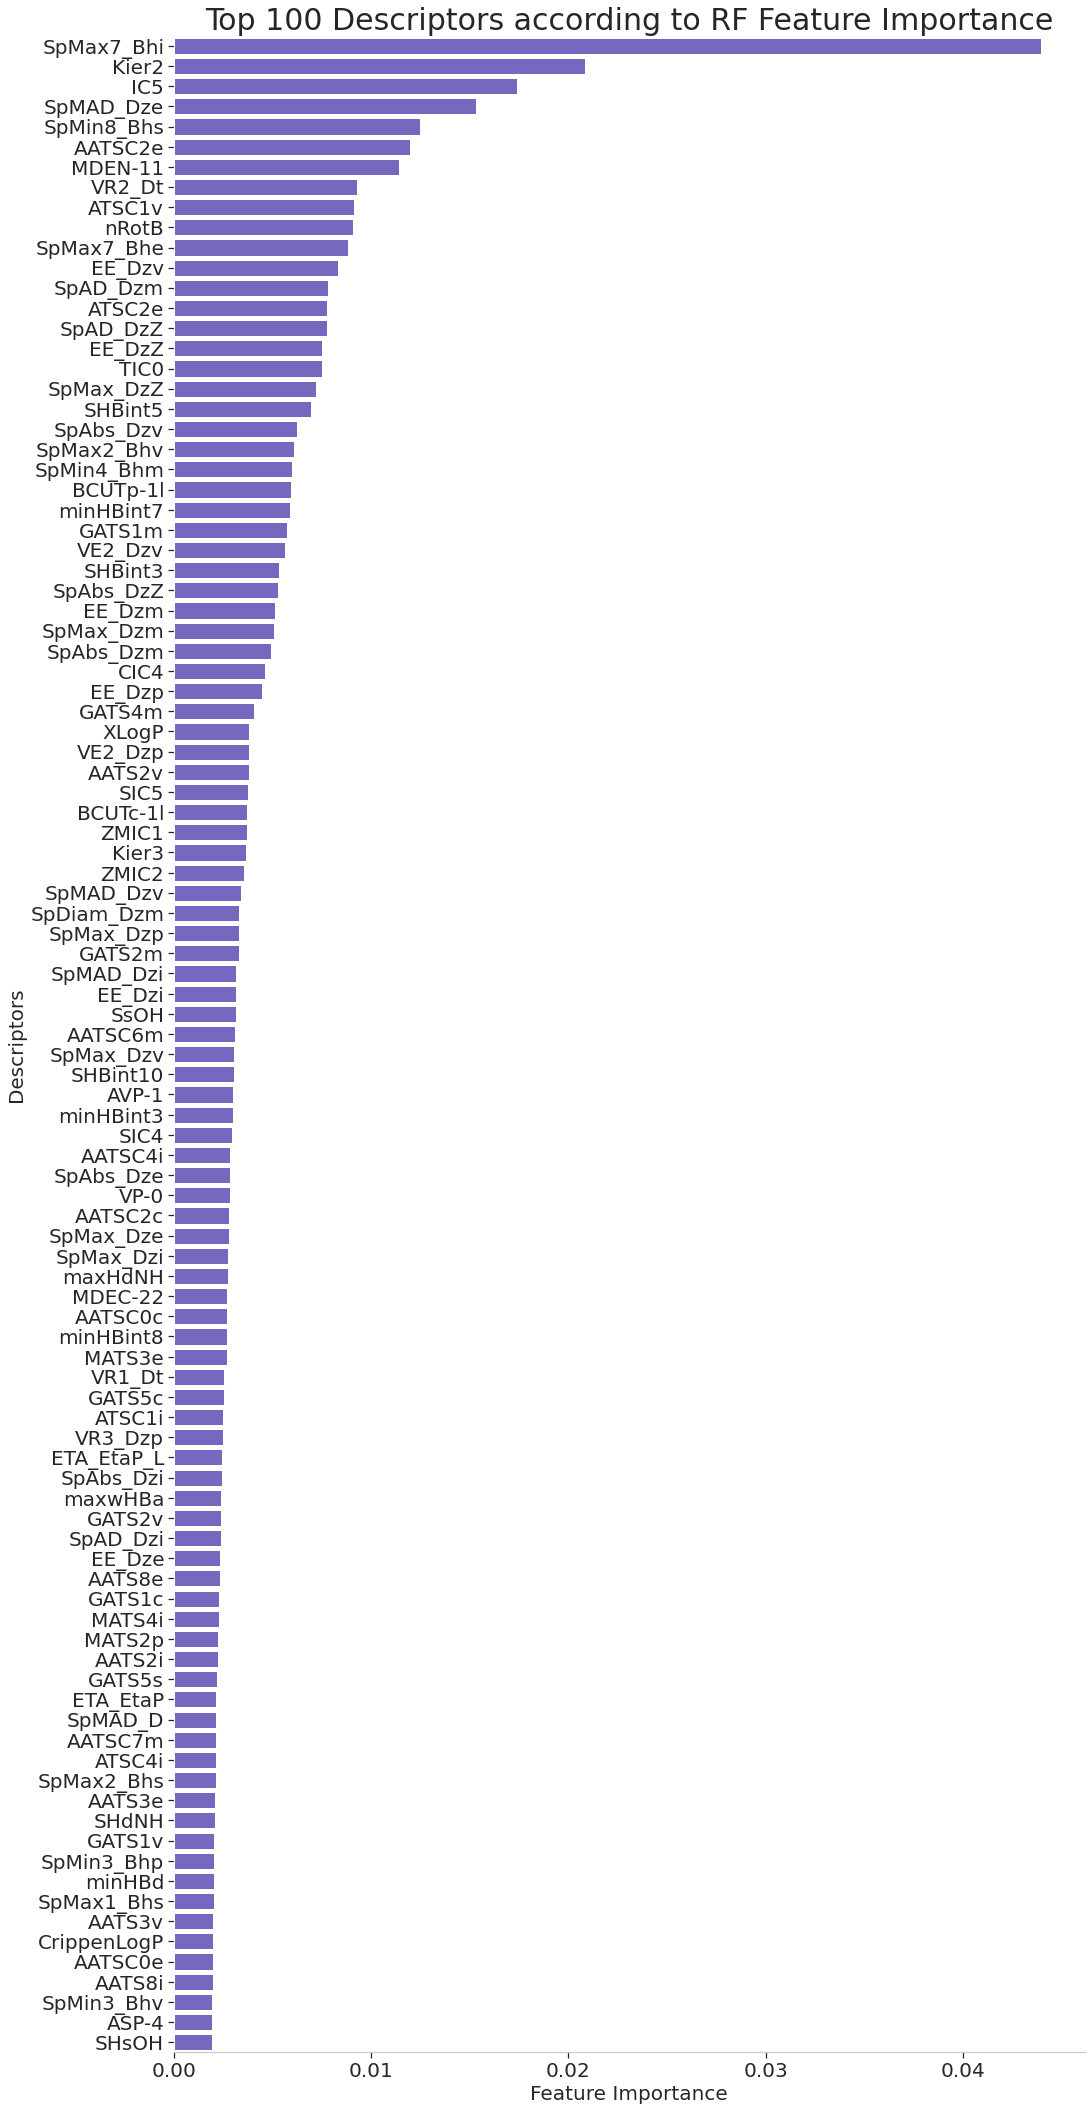

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30,30))
fig.tight_layout(pad=5)
sns.set_theme(style="whitegrid")

# Creating a case-specific function to avoid code repetition
def plot_hor_bar(subplot, data):
    plt.subplot(1,2,subplot)
    ax = sns.barplot(y='Descriptor', x='Importance', data=data,
                     color='slateblue')
    plt.title('Top 100 Descriptors according to RF Feature Importance',
              fontsize=30)
    plt.xlabel('Feature Importance', fontsize=20)
    plt.xticks(fontsize=20)
    plt.ylabel('Descriptors',  fontsize=20)
    plt.yticks(fontsize=20)
    sns.despine(left=True)
    ax.grid(False)
    ax.tick_params(bottom=True, left=True)
    plt.savefig("Top_100_Random_forest_feature_importance.png")

    return None

plot_hor_bar(1, plotdata)
plt.show()

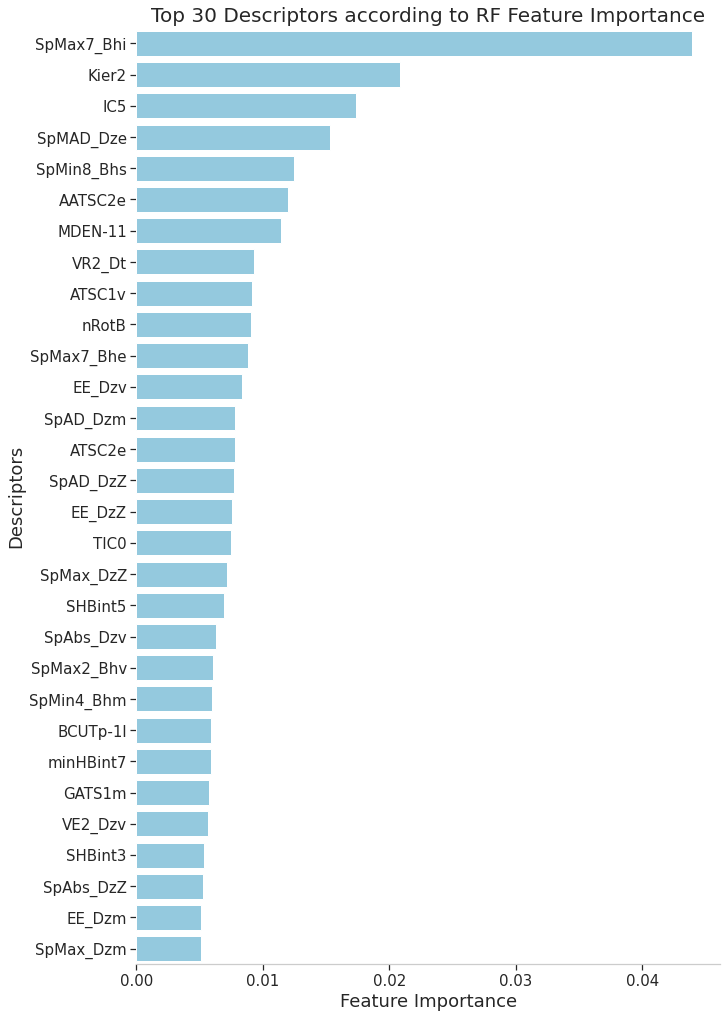

In [ ]:
plotdata = df_featureImportance.head(30)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,15))
fig.tight_layout(pad=5)
sns.set_theme(style="whitegrid")

# Creating a case-specific function to avoid code repetition
def plot_hor_bar(subplot, data):
    plt.subplot(1,2,subplot)
    ax = sns.barplot(y='Descriptor', x='Importance', data=data,
                     color='skyblue')
    plt.title('Top 30 Descriptors according to RF Feature Importance',
              fontsize=20)
    plt.xlabel('Feature Importance', fontsize=18)
    plt.xticks(fontsize=15)
    plt.ylabel('Descriptors',  fontsize=18)
    plt.yticks(fontsize=15)
    sns.despine(left=True)
    ax.grid(False)
    ax.tick_params(bottom=True, left=True)
    plt.savefig("Top_30_Random_forest_feature_importance.png")

    return None

plot_hor_bar(1, plotdata)
plt.show()

In [ ]:
df_featureImportance.to_csv('Random_forest_feature_importance.csv', index=True)

from google.colab import files
files.download('Random_forest_feature_importance.csv')
files.download("Top_30_Random_forest_feature_importance.png")
files.download("Top_100_Random_forest_feature_importance.png")  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>